<a href="https://colab.research.google.com/github/SwathiAunooru/DataScience/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [57]:
x_train.shape

(50000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

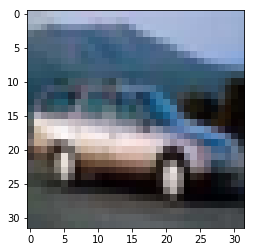

In [59]:
img = plt.imshow(x_train[4])

In [0]:
y_train_one_hot = keras.utils.to_categorical(y_train,10)
y_test_one_hot = keras.utils.to_categorical(y_test,10)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [62]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [0]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())


In [0]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10, activation='softmax'))


In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [72]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 19s 478us/step - loss: 2.1057 - acc: 0.2155 - val_loss: 1.9388 - val_acc: 0.3028
Epoch 2/20
40000/40000 [==============================] - 18s 448us/step - loss: 1.8303 - acc: 0.3399 - val_loss: 1.6652 - val_acc: 0.4106
Epoch 3/20
40000/40000 [==============================] - 18s 446us/step - loss: 1.6706 - acc: 0.3959 - val_loss: 1.5596 - val_acc: 0.4428
Epoch 4/20
40000/40000 [==============================] - 17s 434us/step - loss: 1.5586 - acc: 0.4360 - val_loss: 1.4909 - val_acc: 0.4682
Epoch 5/20
40000/40000 [==============================] - 17s 426us/step - loss: 1.4780 - acc: 0.4678 - val_loss: 1.3760 - val_acc: 0.5003
Epoch 6/20
40000/40000 [==============================] - 17s 414us/step - loss: 1.3877 - acc: 0.4997 - val_loss: 1.3172 - val_acc: 0.5319
Epoch 7/20
40000/40000 [==============================] - 17s 414us/step - loss: 1.3112 - acc: 0.5286 - val_loss: 1.

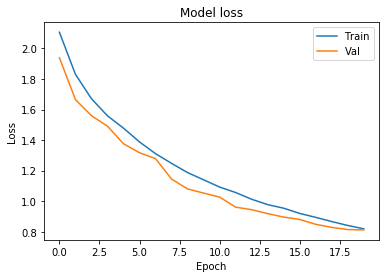

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

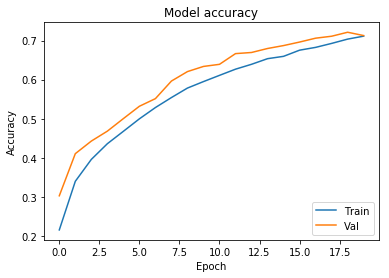

In [74]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()